In [1]:
import numpy as np
from tqdm import tqdm
import time

import pyhf

print("pyhf version: ", pyhf.__version__)


#Plot's Making  Packages
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, BoundaryNorm
from matplotlib.collections import LineCollection
from matplotlib import cm


%config InlineBackend. figure_format = 'retina'

pyhf version:  0.5.4


# Fitting Procedure

* Heavy–quark Yukawa couplings to the light (heavy) CP–even Higgs bosons for type II 2HDM.

Correction            |           Type II             | 
----------------------|:-----------------------------:|
1+ $\Delta^{h^0}_t$   | $\frac{\cos\alpha}{\sin\beta}$  |  
1+ $\Delta^{h^0}_b$   | $-\frac{\sin\alpha}{\cos\beta}$ |  
1+ $\Delta^{H^0}_t$   | $\frac{\sin\alpha}{\sin\beta}$  |  
1+ $\Delta^{H^0}_b$   | $\frac{\cos\alpha}{\cos\beta}$  |  

* Triple Higgs interactions involving the neutral CP–even Higgs fields in the 2HDM.

$$\lambda_{h^0h^0H^0} = \frac{\cos(\beta-\alpha)}{\sin2\beta}\left[\sin2\alpha(2m^2_{h^0}+m^2_{H^0})-\frac{2M_{12}^2}{\sin2\beta}(3\sin2\alpha-\sin2\beta) \right]$$

* The cross section is propotional to amplitude square: 

$$\sigma \propto|\mathcal{A}(pp\to H \to hh \to b\bar{b}b\bar{b})|^2 \propto $$

$$\left|\left[ (1+ \Delta^{H^0}_t)\times\lambda_{h^0h^0H^0}\times(1+ \Delta^{h^0}_b)^2 \right] + \left[(1+ \Delta^{H^0}_b)\times\lambda_{h^0h^0H^0}\times(1+ \Delta^{h^0}_b)^2\right] \right|^2 =$$

$$\left| \left[ (1+ \Delta^{H^0}_t)+(1+ \Delta^{H^0}_b)\right]\times\lambda_{h^0h^0H^0}\times(1+ \Delta^{h^0}_b)^2  \right|^2$$

* The relation between upper limit for number of signal and  number of survival Monte Carlo signal samples at benchmark point can be written in

$$\frac{N^{sig}_{\text{limit}}}{N^{sig}_{\text{MC}}}= \frac{|\mathcal{A}(pp\to H \to hh \to b\bar{b}b\bar{b})|^2(\cos(\beta-\alpha),M_{12}^2)}{|\mathcal{A}(pp\to H \to hh \to b\bar{b}b\bar{b})|^2_{\tan\beta=5,M_{12}^2=400000,\cos(\beta-\alpha)=0.08}}$$


* Our benchmark point is at $\tan\beta$=5, $M_{12}^2$=400000$\text{GeV}^2$, $\cos(\beta-\alpha)$=0.08, $M_H=M_A=M_{H^{\pm}}$=1000GeV, $M_h$=125GeV. 
> At this benchmark point, we the $H\to h h $ is dominant decay mode. ($Br(H\to h h)\approx $0.85)


* $N^{sig}_{\text{limit}}$ is the function of $\cos(\beta-\alpha)$ and $M_{12}^2$.

$$N^{sig}_{\text{limit}}= \frac{|\mathcal{A}(pp\to H \to hh \to b\bar{b}b\bar{b})|^2(\cos(\beta-\alpha),M_{12}^2)}{|\mathcal{A}(pp\to H \to hh \to b\bar{b}b\bar{b})|^2_{\tan\theta=5,M_{12}^2=400000,\cos(\beta-\alpha)=0.08}}\times N^{sig}_{\text{MC}}$$

* $N^{sig}_{\text{MC}}$, $N^{bkg}_{\text{MC}}$ can be obtained after we apply ML classifier.


* Treat $N^{sig}_{\text{MC}}$, $N^{bkg}_{\text{MC}}$ as 1 bin case and use CLs method to get expected signal strengths in $2\sigma$ and $1\sigma$ bands at 95%C.L.

* Translate expected signal strengths to be number of signal events in $2\sigma$ and $1\sigma$ bands at 95%C.L.
$$1\sigma\,\, \text{band} = [s_{-1\sigma}\times N^{sig}_{\text{MC}},s_{1\sigma}\times N^{sig}_{\text{MC}}]$$
$$2\sigma\,\, \text{band} = [s_{-2\sigma}\times N^{sig}_{\text{MC}},s_{2\sigma}\times N^{sig}_{\text{MC}}]$$

* After scan $\cos(\beta-\alpha)$ and $M_{12}^2$, we can pick allowed sets which let $N^{sig}_{\text{limit}}$ in the $1\sigma\,\, \text{band}$ or $2\sigma\,\, \text{band}$ regions.


Ref: [Higgs pair production via gluon fusion in the Two-Higgs-Doublet Model](https://arxiv.org/abs/1407.0281)  
Ref: [Exploring sizable triple Higgs couplings in the 2HDM](https://arxiv.org/abs/2005.10576)  
Ref: [LHC Search of New Higgs Boson via Resonant Di-Higgs Production with Decays into 4W](https://arxiv.org/abs/1706.05980)

## Couplings in 2HDM Type II

In [2]:
"""
Convertion:
0 ≤ \beta - \alpha ≤ 𝜋


0 < \beta <  𝜋/2
"""


"""
lambda_Hhh(cb_a, m12s, tb, mH, mh=125 )
"""

def lambda_Hhh(cb_a, m12s, tb, mH, mh=125 ):
    b_a = np.arccos(cb_a)
    b = np.arctan(tb)
    a = np.arctan(tb) - np.arccos(cb_a)
    
    ########################################################################
    """
    arXiv:2005.10576v2 Eq. (32)
    """
    
    part_a = (2*mh**2+mH**2-4*(m12s/(np.sin(b)*np.cos(b))))*np.sin(b_a)**2
    part_b = 2*1/np.tan(2*b)*(2*mh**2+mH**2-3*(m12s/(np.sin(b)*np.cos(b))))*np.sin(b_a)*cb_a
    part_c = (2*mh**2+mH**2-2*(m12s/(np.sin(b)*np.cos(b))))*cb_a**2

    return -1*cb_a/246*(part_a+part_b-part_c)
    ########################################################################
    
    
    
"""
gHt(cb_a, tb)
"""
def gHt(cb_a, tb):
    b_a = np.arccos(cb_a)
    b = np.arctan(tb)
    a = np.arctan(tb) - np.arccos(cb_a)
    
    return np.sin(a)/np.sin(b)

    
"""
gHb(cb_a, tb)
"""
def gHb(cb_a, tb):
    b_a = np.arccos(cb_a)
    b = np.arctan(tb)
    a = np.arctan(tb) - np.arccos(cb_a)
    
    return np.cos(a)/np.cos(b)
    

"""
ght(cb_a, tb)
"""
def ght(cb_a, tb):
    b_a = np.arccos(cb_a)
    b = np.arctan(tb)
    a = np.arctan(tb) - np.arccos(cb_a)
    
    return np.cos(a)/np.sin(b)

    
"""
ghb(cb_a, tb)
"""
def ghb(cb_a, tb):
    b_a = np.arccos(cb_a)
    b = np.arctan(tb)
    a = np.arctan(tb) - np.arccos(cb_a)
    
    return -1*np.sin(a)/np.cos(b)
    
    
    
"""
Constraint(cb_a, m12s, tb, mH, mh=125, luminosity = 3000, acceptance = 0.5, Xection = 0.01)

luminosity (fb^-1)
Xection (pd)

m_h:    125.00000
m_H:   1000.00000
m_A:   1001.00000
m_H+:   1001.00000
sin(b-a):      0.99612
lambda_6:      0.00000
lambda_7:      0.00000
m12^2: 400000.00000
tan(beta):      5.00000  (fix)


np.arctan(5) - 𝜋  ≤ \alpha ≤  np.arctan(5)

"""    
    
def Constraint_N(cb_a, m12s, tb, mH, mh=125, luminosity = 3000, acceptance = 0.5, Xection = 0.01):
    
    N_MC = luminosity*acceptance*(Xection*1000)
    
    numerator = ((1+gHt(cb_a, tb)) + (1+gHb(cb_a, tb)))**2 * (lambda_Hhh(cb_a, m12s, tb, mH, mh=125 )**2) * (1+ghb(cb_a, tb))**4
    
    cba = np.cos(np.arcsin(0.99612))
    denominator =  ((1+gHt(cba, 5)) + (1+gHb(cba, 5)))**2 * (lambda_Hhh(cba, 400000, 5, 1000, mh=125 )**2) * (1+ghb(cba, 5))**4
    
    return N_MC*(numerator/denominator) #




"""
Statistics
"""

def chi_square(n_s, n_b):
    
    #[(s+b - b) / sqrt(b)]^2
    
    chisquare = (n_s)**2/n_b
    
    return chisquare

def tmu_pyhf(nH, n_QCD):

    model = pyhf.simplemodels.hepdata_like(
        signal_data=[nH], bkg_data=[n_QCD], bkg_uncerts=[np.sqrt(n_QCD)]

    )

    test_mu = 1.0
    init_pars = model.config.suggested_init()
    par_bounds = model.config.suggested_bounds()
    par_bounds[model.config.poi_index] = [-10.0, 10.0]
    fixed_params = model.config.suggested_fixed()
    
    return pyhf.infer.test_statistics.tmu(test_mu, observations, model, init_pars, par_bounds, fixed_params)


def qmu_tilde_pyhf(nH, n_QCD):

    model = pyhf.simplemodels.hepdata_like(
        signal_data=[nH], bkg_data=[n_QCD], bkg_uncerts=[np.sqrt(n_QCD)]

    )

    test_mu = 1.0
    init_pars = model.config.suggested_init()
    par_bounds = model.config.suggested_bounds()
    fixed_params = model.config.suggested_fixed()
    
    return pyhf.infer.test_statistics.qmu_tilde(test_mu, observations, model, init_pars, par_bounds, fixed_params)




In [54]:
%%time
time.sleep(1)
start = time.time()

"""
ppbbbb
"""
# Herwig
# 0.425     0.253    
# H: 0.372 QCD: 0.013129 

# default
# 0.426     0.275 
# H: 0.354 QCD: 0.017518
     
# vincia
# 0.421     0.214    
# H: 0.368 QCD: 0.011385 

# dipole
# 0.417     0.206  
# H: 0.371 QCD: 0.018809 

                

"""
ppjjjj
"""
# Herwig
# 0.425     0.245   
# H: 0.364 QCD: 0.000000  

# default
# 0.427     0.274
# H: 0.357 QCD: 0.000074 
     
# vincia
# 0.422     0.224   
# H: 0.372 QCD: 0.000074 

# dipole
# 0.417     0.238  
# H: 0.354 QCD: 0.000000


dictionary = {
              "sig_Xection" : 0.00081305,
              "sig_Branching_ratio" : 0.8*0.6*0.6,
              "sig_acceptance": 0.354*0.426,
              "bkg_Xection" : 0.27741793,  # ppbbbb
              "bkg_acceptance" : 0.017518*0.275,
#               "bkg_Xection" : 7699.04176498,  # ppjjjj
#               "sig_acceptance" : 0.427*0.357,
#               "bkg_acceptance" : 0.274*0.000074 ,
              "luminosity": 3000
              }
    
    
    
    
    
    
n_H = dictionary["sig_Xection"]*dictionary["sig_Branching_ratio"]*dictionary["sig_acceptance"]*dictionary["luminosity"]*1000  
n_QCD = dictionary["bkg_Xection"]*dictionary["bkg_acceptance"]*dictionary["luminosity"]*1000

print("# of H survival: {}".format(n_H))
print("# of QCD survival: {}".format(n_QCD))
print("Z= ", n_H/np.sqrt(n_QCD))
time.sleep(1)

n_slice = 5000
cb_a = np.linspace(-1 , 1,  n_slice)
m12_s = np.linspace(1E+5, 1E+6,  n_slice)


"""
Old
"""
##################
# cba = []
# m12s = []

# for element in tqdm(cb_a):
#     for j in range(len(m12_s)):
#         cba.append(element)
#         m12s.append(m12_s[j])

# cba = np.array(cba)
# m12s = np.array(m12s)   
# tb = np.full(n_slice*n_slice, 5)
# mH = np.full(n_slice*n_slice, 1000)
# mh = np.full(n_slice*n_slice, 125)
# luminosity = np.full(n_slice*n_slice, dictionary["luminosity"])
# acceptance = np.full(n_slice*n_slice, dictionary["sig_acceptance"])
# Xection = np.full(n_slice*n_slice, dictionary["sig_Xection"]*dictionary["sig_Branching_ratio"])

# # constraint_n = np.vectorize(Constraint_N)(cba, m12s, tb, mH, mh, luminosity, acceptance, Xection)
# constraint_n = Constraint_N(cba, m12s, tb, mH, mh, luminosity, acceptance, Xection)
# # print(constraint_n)
##################



cba, m12s = np.meshgrid(cb_a, m12_s)
tb = np.full((n_slice, n_slice), 5)
mH = np.full((n_slice, n_slice), 1000)
mh = np.full((n_slice, n_slice), 125)
luminosity = np.full((n_slice, n_slice), dictionary["luminosity"])
acceptance = np.full((n_slice, n_slice), dictionary["sig_acceptance"])
Xection = np.full((n_slice, n_slice), dictionary["sig_Xection"]*dictionary["sig_Branching_ratio"])

# constraint_n = np.vectorize(Constraint_N)(cba, m12s, tb, mH, mh, luminosity, acceptance, Xection)
constraint_n = Constraint_N(cba, m12s, tb, mH, mh, luminosity, acceptance, Xection)


finish = time.time()
print("Total TIme: {} min".format((finish-start)/60))


# of H survival: 105.93607006079998
# of QCD survival: 4009.3410206354997
Z=  1.6730439856432833
Total TIme: 0.29718565543492637 min
CPU times: user 13.4 s, sys: 3.44 s, total: 16.8 s
Wall time: 18.8 s


# Upper Limit of Signal Strength by CLs Method

Ref :[pyhf.infer.intervals.upperlimit](https://scikit-hep.org/pyhf/_generated/pyhf.infer.intervals.upperlimit.html?highlight=limit#pyhf.infer.intervals.upperlimit)


In [55]:
%%time
model = pyhf.simplemodels.hepdata_like(
    signal_data=[n_H], bkg_data=[n_QCD], bkg_uncerts=[np.sqrt(n_QCD)]
    
)
# print(model)

# print("Explore model")
# print(f"  channels: {model.config.channels}")
# print(f"     nbins: {model.config.channel_nbins}")
# print(f"   samples: {model.config.samples}")
# print(f" modifiers: {model.config.modifiers}")
# print(f"parameters: {model.config.parameters}")
# print(f"  nauxdata: {model.config.nauxdata}")
# print(f"   auxdata: {model.config.auxdata}")

# print("Expected data: ", model.expected_data([1.0, 1.0]))
# print("Expected actualdata: ", model.expected_actualdata([1.0, 1.0]))
# print("Expected auxdata: ", model.expected_auxdata([1.0, 1.0, 0.0]))

# init_pars = model.config.suggested_init()
# bounds = model.config.suggested_bounds()
# print("init_pars: ", init_pars)
# print("bounds: ", bounds)
# print("the index of the parameter: ", model.config.poi_index)

observations = [n_QCD] + model.config.auxdata  # this is a common pattern!
print("observations: ", observations)


scan = np.linspace(0, 5, 201)

obs_limit, exp_limits, (scan, results) = pyhf.infer.intervals.upperlimit(
                                                                        observations, 
                                                                        model, 
                                                                        scan, 
                                                                        return_results=True
                                                                        )


print("CLs: {:.3f}".format(obs_limit))
print("CLexp: {:.4f}, −2σ: {:.4f}, −1σ: {:.4f}, 0σ: {:.4f}, 1σ: {:.4f}, 2σ: {:.4f} ".format(obs_limit,exp_limits[0],exp_limits[1],exp_limits[2],exp_limits[3],exp_limits[4]))

observations:  [4009.3410206354997, 4009.3410206355]
CLs: 1.657
CLexp: 1.6571, −2σ: 0.8894, −1σ: 1.1938, 0σ: 1.6571, 1σ: 2.3059, 2σ: 3.0918 
CPU times: user 3.19 s, sys: 7.72 ms, total: 3.2 s
Wall time: 3.2 s


In [5]:

# mu_test = 1.2454
# CLs_asy, CL_asy, expected_asy, expected_set_asy = pyhf.infer.hypotest(
#                                 mu_test, 
#                                 observations, 
#                                 model, 
#                                 return_tail_probs=True,  #returning CLs and [CL_s+b, CL_b]
#                                 return_expected = True, # returning CLexp
#                                 return_expected_set=True, #returning (−2,−1,0,1,2)\sigma CLexp
#                                 test_stat="qtilde", # 
#                                 calctype="asymptotics" #default
#                             )

# print("CLs: {:.3f}, CL_sb: {:.3f}, CL_b: {:.3f} ".format(CLs_asy, CL_asy[0], CL_asy[1]))
# print("CLexp: {:.4f}, −2σ: {:.4f}, −1σ: {:.4f}, 0σ: {:.4f}, 1σ: {:.4f}, 2σ: {:.4f} ".format(expected_asy,expected_set_asy[0],expected_set_asy[1],expected_set_asy[2],expected_set_asy[3],expected_set_asy[4]))


# Pick Allowed Parameter sets

In [88]:
%%time

Limit = {"−2sigma": exp_limits[0],
         "−1sigma": exp_limits[1], 
         "expected": exp_limits[2],
         "1sigma": exp_limits[3], 
         "2sigma": exp_limits[4]
        }

"""
1σ
"""
n_low_1 = n_H*Limit["−1sigma"]
n_high_1 = n_H*Limit["1sigma"]

print("1\sigma: [{} , {}] ".format(n_low_1,n_high_1))

"2σ"
n_low_2 = n_H*Limit["−2sigma"]
n_high_2 = n_H*Limit["2sigma"]
print("2\sigma: [{} , {}] ".format(n_low_2,n_high_2))

constraint_alowed_1 = np.where(constraint_n > n_low_1, constraint_n, 0 )
constraint_alowed_1 = np.where(constraint_alowed_1 < n_high_1, constraint_alowed_1, 0 )

# constraint_alowed_1 = np.where(constraint_alowed_1 < np.sqrt(2.3*n_QCD), constraint_alowed_1, 0 )

constraint_alowed_1_boundary = np.where(constraint_alowed_1 > 0, 1, constraint_alowed_1 )
allowed_region_1 = np.where(constraint_alowed_1 != 0)


constraint_alowed_2 = np.where(constraint_n > n_low_2, constraint_n, 0 )
constraint_alowed_2 = np.where(constraint_alowed_2 < n_high_2, constraint_alowed_2, 0 )

# constraint_alowed_2 = np.where(constraint_alowed_2 < np.sqrt(6.18*n_QCD), constraint_alowed_2, 0 )


constraint_alowed_2_boundary = np.where(constraint_alowed_2 > 0, 1, constraint_alowed_2 )
allowed_region_2 = np.where(constraint_alowed_2 != 0)

print("len(allowed_region_1)", len(allowed_region_1))
print("len(allowed_region_2)", len(allowed_region_2))

##############################

# # constraint_alowed_1 = np.where(constraint_n > n_low_1, constraint_n, 0 )
# constraint_alowed_1 = np.where(constraint_n < np.sqrt(2.3*n_QCD), constraint_n, 0 )
# constraint_alowed_1_boundary = np.where(constraint_alowed_1 > 0, 1, constraint_alowed_1 )
# allowed_region_1 = np.where(constraint_alowed_1 != 0)


# # constraint_alowed_2 = np.where(constraint_n > 2.5*n_QCD, constraint_n, 0 )
# constraint_alowed_2 = np.where(constraint_n < np.sqrt(6.18*n_QCD), constraint_n, 0 )
# constraint_alowed_2_boundary = np.where(constraint_alowed_2 > 0, 1, constraint_alowed_2 )
# allowed_region_2 = np.where(constraint_alowed_2 != 0)

# print("len(allowed_region_1)", len(allowed_region_1))
# print("len(allowed_region_2)", len(allowed_region_2))



chi = chi_square(constraint_alowed_2[allowed_region_2], n_QCD)
min_index = np.where(chi == np.min(chi))[0][0]
cba_min = cba[allowed_region_2][min_index]
m12s_min = m12s[allowed_region_2][min_index]
x_min_index, y_min_index = np.where(cba[0,:] == cba_min), np.where(m12s[:,0] == m12s_min)

1\sigma: [126.46566271446909 , 244.28023151658613] 
2\sigma: [94.21492385240853 , 327.5334313005715] 
len(allowed_region_1) 2
len(allowed_region_2) 2
CPU times: user 468 ms, sys: 373 ms, total: 841 ms
Wall time: 840 ms


In [87]:
np.sort(chi)

array([2.21394587, 2.2139496 , 2.2139533 , ..., 6.17990903, 6.17991324,
       6.17995146])

In [79]:
np.where(chi == np.min(chi))

(array([420977]),)

In [80]:
b = np.arctan(5)
a = np.arctan(5) - np.arccos(0.4)
print(1+ghb(0.2, 5))
# "sig_Xection" : 0.00081305,
# "sig_Branching_ratio" : 0.8*0.6*0.6,
# "sig_acceptance": 0.354*0.426,
aaa = Constraint_N(0.08, 400000, 5, 1000, 125, 3000, 0.354*0.426, 0.00081305*0.8*0.6*0.6)
print(aaa)
print(n_QCD)
print(aaa**2/n_QCD)

0.9797958971132714
105.0566508158605
4009.3410206354997
2.7527964879615654


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: No contour levels were found within the data range.


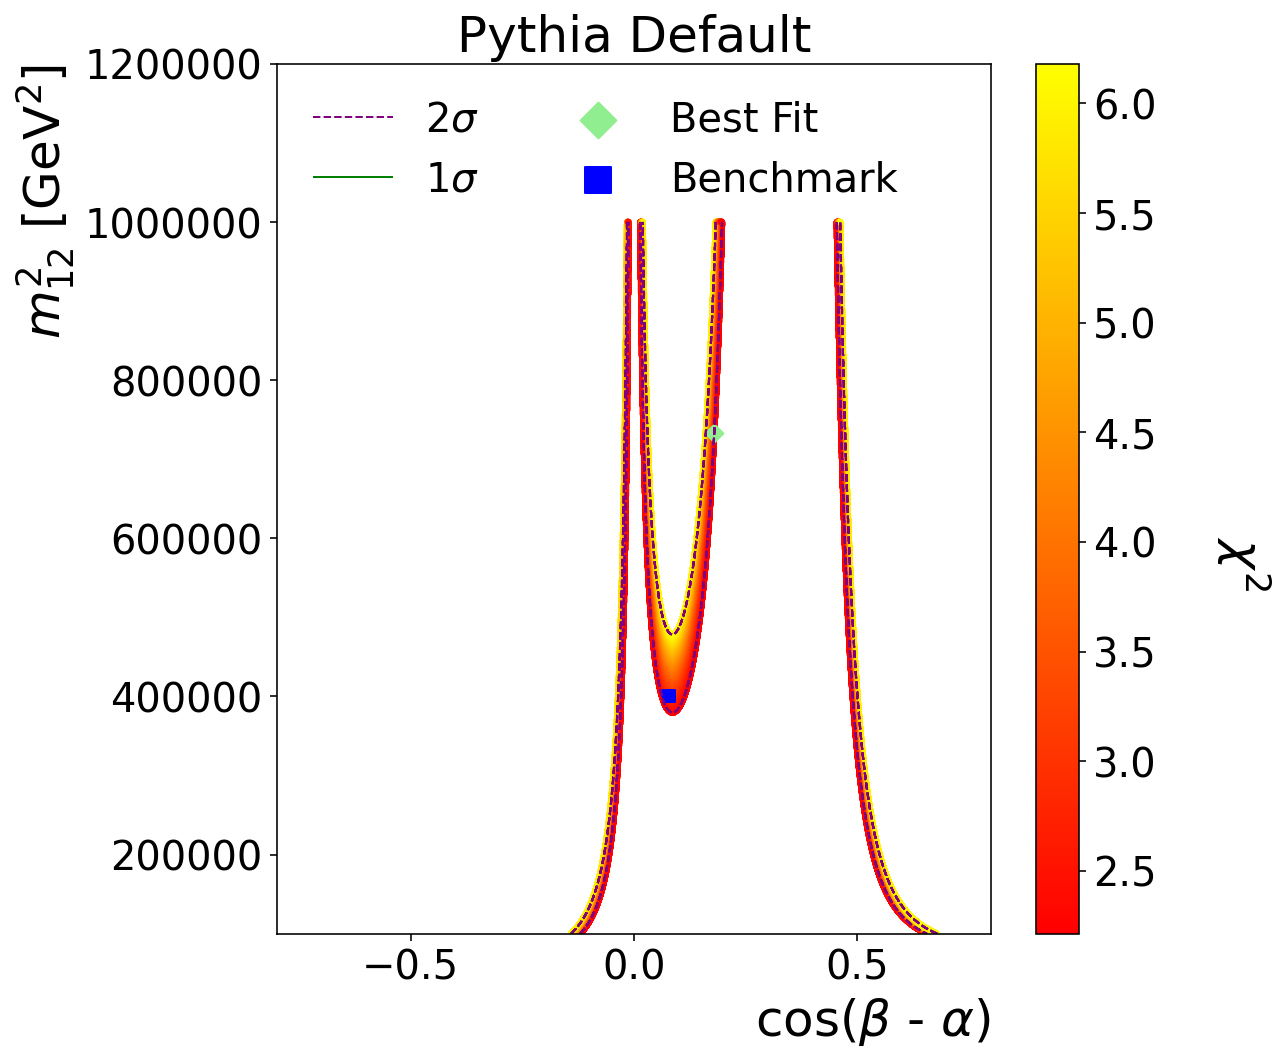

CPU times: user 8.66 s, sys: 181 ms, total: 8.84 s
Wall time: 8.76 s


In [86]:
%%time
fig, ax = plt.subplots(1,1, figsize=(8,8))

plt.title("Pythia Default",fontsize=25)

plt.scatter(cba[allowed_region_2],m12s[allowed_region_2], marker=".", s=20 ,
            c=chi,
            cmap="autumn"
           )


            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=20)
# cbar.set_ticks(np.arange(0.0, 25.0, 5))
# cbar.set_ticks([0.0, 5, 10, 15, 25.0])
plt.text(x=0.8+0.5, y=550000, s="$\chi^2$", fontsize=25, rotation=270)


# Python contour plot
# Ref: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html

CS_2_sigma = plt.contour(cba, m12s, constraint_alowed_2_boundary, colors='purple', linestyles="--", linewidths=1)
CS_1_sigma = plt.contour(cba, m12s, constraint_alowed_1_boundary, colors='green', linestyles="-", linewidths=1)
# plt.clabel(CS, inline=True, fontsize=10)

CS_2_sigma.collections[0].set_label("2$\sigma$")
CS_1_sigma.collections[0].set_label("1$\sigma$")


plt.scatter(cba[y_min_index, x_min_index],m12s[y_min_index, x_min_index], marker="D", s=40 , c='lightgreen', label = "Best Fit")
plt.scatter(0.08,400000, marker="s", s=40 , c='blue', label = "Benchmark")




plt.xlim((-0.8,0.8))
# plt.xlim((0.,0.09))
plt.ylim((100000,1200000))

ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.xlabel("cos($\\beta$ - $\\alpha$)", fontsize=25, horizontalalignment='right',x=1)
plt.ylabel('$m_{12}^2$ [$\mathrm{GeV}^2$]', fontsize=25,horizontalalignment='right',y=1)
plt.legend(loc="upper left", ncol=2, fontsize=20, markerscale=2., scatterpoints=1,
           edgecolor = "w",fancybox=False, framealpha=0) #bbox_to_anchor=(0.7, 0.1),
plt.ticklabel_format(style='plain')
# plt.grid()
# plt.savefig("./Higgs_Pt/Comparison_ROC.pdf", transparent=True)
# plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

No handles with labels found to put in legend.


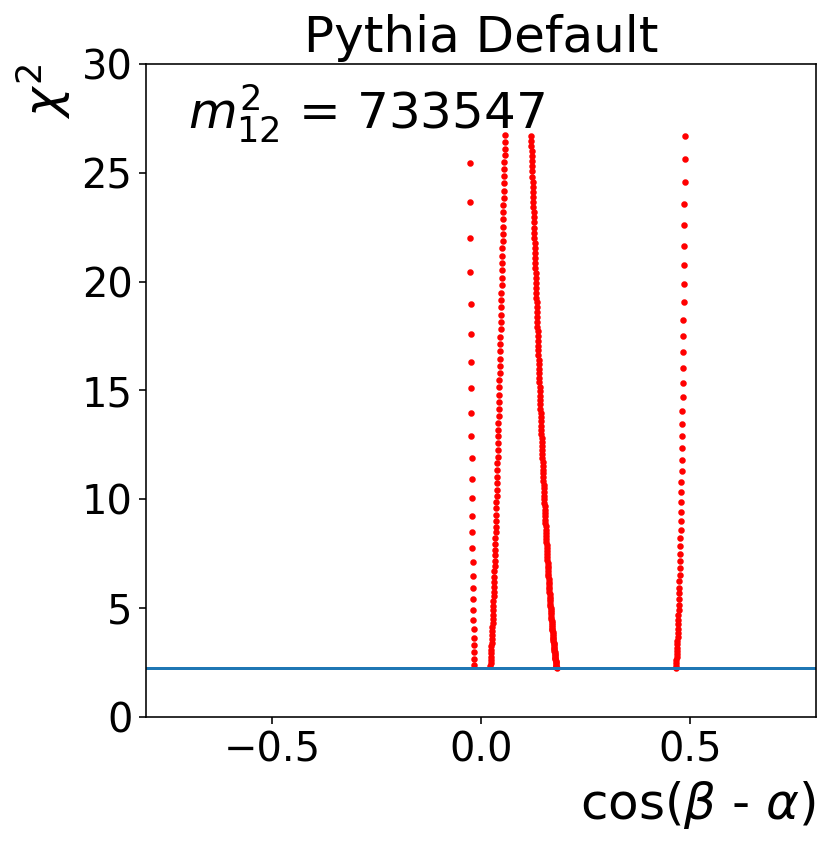

In [60]:
fig, ax = plt.subplots(1,1, figsize=(6,6))


plt.title("Pythia Default",fontsize=25)


tmp = np.where(m12s[allowed_region_2]== m12s[allowed_region_2][min_index])
plt.scatter(cba[allowed_region_2][tmp],chi[tmp], marker=".", s=20 , c="r")

plt.text(x=-0.7, y=27, s="$m_{12}^2$ = " + str(round(m12s[allowed_region_2][min_index])), fontsize=25)


plt.hlines(xmin=-1,  xmax=1,y= np.sort(chi)[0],)

plt.xlim((-0.8,0.8))
plt.ylim((0,30))
# plt.xlim((0.,0.09))
# plt.ylim((100000,1000000))

ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.xlabel("cos($\\beta$ - $\\alpha$)", fontsize=25,horizontalalignment='right',x=1)
# plt.ylabel('$\\tilde{q}$', fontsize=25,horizontalalignment='right',y=1)
plt.ylabel('$\chi^2$', fontsize=25,horizontalalignment='right',y=1)
plt.legend(ncol=1, fontsize=20, markerscale=2., scatterpoints=1,
           edgecolor = "w",fancybox=False, framealpha=0) #bbox_to_anchor=(0.7, 0.1),
plt.ticklabel_format(style='plain')
# plt.grid()
# plt.savefig("./Higgs_Pt/Comparison_ROC.pdf", transparent=True)
# plt.subplots_adjust(wspace=0.5, hspace=0.5)



plt.show()

No handles with labels found to put in legend.


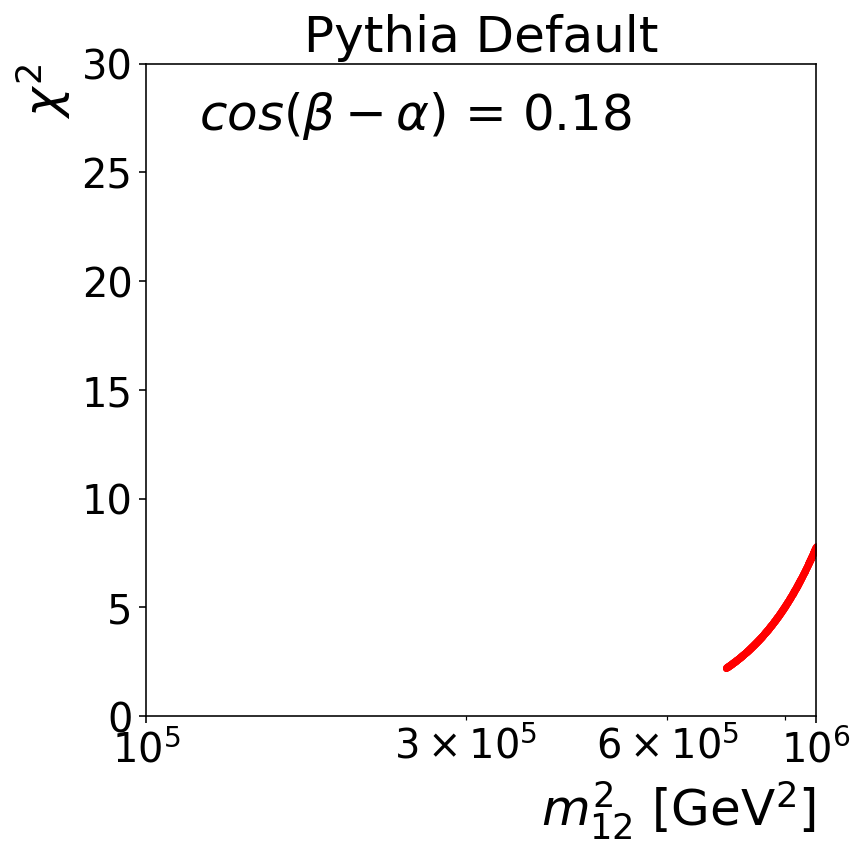

In [59]:
fig, ax = plt.subplots(1,1, figsize=(6,6))


plt.title("Pythia Default",fontsize=25)


tmp = np.where(cba[allowed_region_2]== cba[allowed_region_2][min_index])
plt.scatter(m12s[allowed_region_2][tmp],chi[tmp], marker=".", s=20 , c="r")

plt.text(x=120000, y=27, s="$cos(\\beta-\\alpha )$ = " + str(round(cba[allowed_region_2][min_index],3)), fontsize=25)




# plt.xlim((-1,1))

plt.xlim((100000,1000000))
plt.ylim((0.,30))
plt.xscale("log")

# plt.tick_params(axis='x', labelsize=20)
plt.tick_params(which='both', axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlabel("$m_{12}^2$ [$\mathrm{GeV}^2$]", fontsize=25,horizontalalignment='right',x=1)
# plt.ylabel('$\\tilde{q}$', fontsize=25,horizontalalignment='right',y=1)
plt.ylabel('$\chi^2$', fontsize=25,horizontalalignment='right',y=1)
plt.legend(ncol=1, fontsize=20, markerscale=2., scatterpoints=1,
           edgecolor = "w",fancybox=False, framealpha=0) #bbox_to_anchor=(0.7, 0.1),

# plt.MaxNLocator(10)
# plt.locator_params(axis='x', nbins=10)
ax.xaxis.set_minor_locator(MaxNLocator(3))
# plt.ticklabel_format(style='plain')
# plt.grid()
# plt.savefig("./Higgs_Pt/Comparison_ROC.pdf", transparent=True)
# plt.subplots_adjust(wspace=0.5, hspace=0.5)



plt.show()

In [125]:
# # CNN_Model_A1_name = [
# #                  "Herwig Angular", 
# #                  "Pythia Default",
# #                  "Pythia Vincia", 
# #                  "Pythia Dipole", 
# # #                  "Sherpa Default"
# #                 ]


# fig, ax = plt.subplots(1,1, figsize=(6,6))


# plt.title("Pythia Dipole",fontsize=25)

# plt.scatter(cba[allowed_region_2],m12s[allowed_region_2], marker=".", s=40 , c='gold', label = "2$\sigma$")
# plt.scatter(cba[allowed_region_1],m12s[allowed_region_1], marker=".", s=40 , c='green', label = "1$\sigma$")
# plt.scatter(0.08,400000, marker="D", s=40 , c='red', label = "Benchmark")



# plt.xlim((-1,1))
# # plt.xlim((0.,0.09))
# plt.ylim((100000,1000000))

# ax.tick_params(axis='x', labelsize=20)
# ax.tick_params(axis='y', labelsize=20)
# plt.xlabel("cos($\\beta$ - $\\alpha$)", fontsize=25,horizontalalignment='right',x=1)
# plt.ylabel('$m_{12}^2$ [$\mathrm{GeV}^2$]', fontsize=25,horizontalalignment='right',y=1)
# plt.legend(ncol=1, fontsize=20, markerscale=2., scatterpoints=1,
#            edgecolor = "w",fancybox=False, framealpha=0) #bbox_to_anchor=(0.7, 0.1),
# plt.ticklabel_format(style='plain')
# # plt.grid()
# # plt.savefig("./Higgs_Pt/Comparison_ROC.pdf", transparent=True)
# # plt.subplots_adjust(wspace=0.5, hspace=0.5)
# plt.show()